In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 15\\')

In [3]:
pwd

'C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 15'

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
display (df)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
dfcorr = df.drop ('Geography', axis =1).drop ('Gender', axis =1).drop ('Exited', axis =1)
dfcorr = dfcorr.iloc[:,3:]
display (dfcorr)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [6]:
dfcorr.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


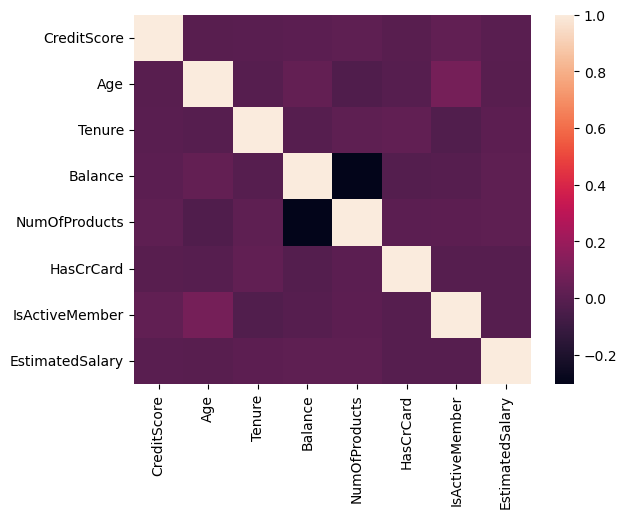

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.heatmap (dfcorr.corr())
plt.show()

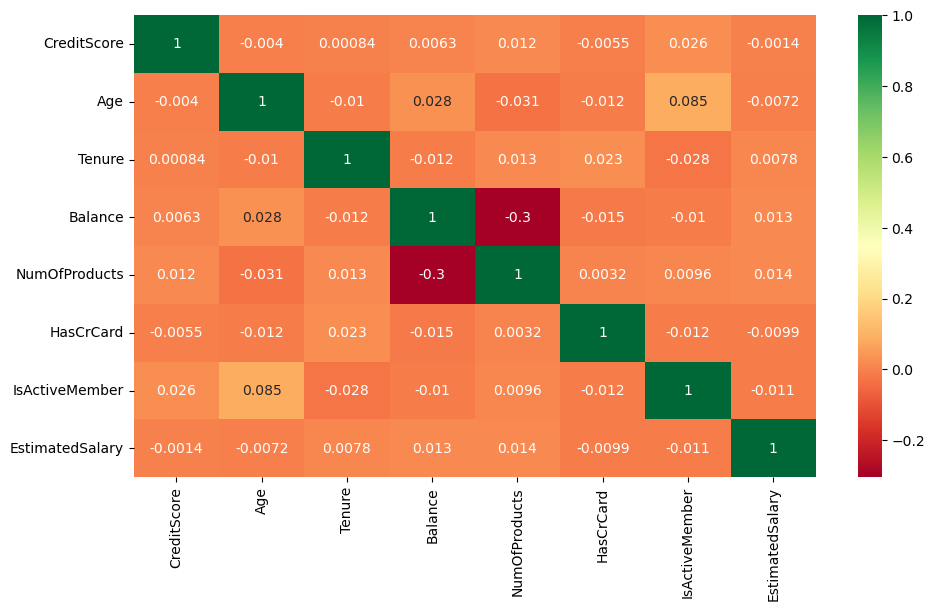

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
sns.heatmap(dfcorr.corr(),annot=True,cmap="RdYlGn")
plt.show()


In [11]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [12]:
X=df.iloc[:,3:13]
display (X)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
Y=df.iloc[:,13]
display (Y)


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
print (X['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [15]:
geography=pd.get_dummies(X['Geography'],dtype = int)
display (geography.head(10))


,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [16]:
geography=pd.get_dummies(X['Geography'],drop_first=True,dtype = int)
display (geography.head(10))


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
5,0,1
6,0,0
7,1,0
8,0,0
9,0,0


In [17]:
gender=pd.get_dummies(X['Gender'],drop_first=True, dtype = int)
display (gender.head(10))


,Male
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,1


In [18]:
X=X.drop(['Geography','Gender'],axis=1)
display (X)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [19]:
X=pd.concat([X,geography,gender],axis=1)
display (X)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [23]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }


In [20]:
6 *8*4*5*4

3840

In [ ]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [24]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)


In [25]:

from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))


'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   d2_absolute_error_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_max_error,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   neg_root_mean_squared_log_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples, 

In [26]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [27]:

from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable



Fitting 10 folds for each of 100 candidates, totalling 1000 fits

 Time taken: 0 hours 0 minutes and 44.89 seconds.


In [28]:
display (random_search.best_params_)

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [ ]:
'''
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }
'''


In [29]:

display (random_search.best_estimator_)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,use_label_encoder=False )


In [31]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)


In [32]:
print (score) 

[0.865 0.859 0.871 0.864 0.863 0.852 0.874 0.871 0.854 0.855]


In [33]:
print (score.mean())
print (score.std())


0.8628
0.007318469785412802


In [34]:

classifier = classifier.fit(X,Y)
print (classifier)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.1, gpu_id=-1, grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=4, ...)


In [35]:
y_pred = classifier.predict(X)
display (y_pred)


array([0, 0, 1, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
print (accuracy_score(Y,y_pred))


0.8804


In [37]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2)
print (X.shape)
print (Y.shape)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)



(10000, 11)
(10000,)
(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [38]:

classifier=xgboost.XGBClassifier()
classifier.fit(x_train,y_train)
print (classifier)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [39]:
y_pred = classifier.predict (x_test)
print (y_pred)


[1 0 0 ... 0 0 0]


In [40]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test,y_pred))


0.848


In [41]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred,zero_division=0))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1606
           1       0.65      0.49      0.56       394

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [42]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_pred)
print (cm)


[[1502  104]
 [ 200  194]]
